<a href="https://colab.research.google.com/github/ludovicoderic/darknet_ros/blob/master/yolov3/DARKNET_ROS_Yolov3_Tutorial_uso_y_entrenamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCCIÓN**
El proposito de este tutorial es aprender a entrenar una red neuronal, de manera que se puedan obtener los pesos necesarios, para implementarlo en **darknet_ros** y obtener así un detector de objetos en el framework de ros, de manera que podamos utilizar la camara Intel Realsense para detectar aquellos objetos que sean necesarios.

En un principio se ha utilizado la red neuronal yolov3, ya que el paquete de darknet_ros de momento solo funciona hasta esa version, pero ir comprobando el github de vez en cuando por si lo actualizan a yolov4, ya que es mas rápido y preciso.

**Nota:** Es necesario para que compile darknet_ros añadir al worspace tambien: 

https://github.com/ros-perception/image_common/tree/ros2
https://github.com/ros-perception/vision_opencv.git

#**COMO HACER QUE FUNCIONE DARKNET_ROS PARA DETECTAR NUESTRAS PROPIAS CLASES**


1.   Para que esto funcione, lo primero a hacer es clonar el repositorio de **darknet_ros** desde el siguiente link: 
https://github.com/leggedrobotics/darknet_ros

  Seguiremos los pasos que vienen el el github para instalar las dependencias necesarias, y para construir correctamente el paquete. Para ello, clonaremos el paquete con el siguiente comando:
```
    cd catkin_workspace/src
    git clone --recursive git@github.com:leggedrobotics/darknet_ros.git -b foxy
    cd ../
```
  Y una vez hecho eso, construiremos el paquete con el siguiente comando:
```
    colcon build
```


2. Una vez hecho esto, la red ya estará correctamente compilada, e incluso se habran descargado los pesos para yolo-voc.weights y tiny-yolo-voc.weights, por si queremos probar la red preentrenada con el dataset de COCO. Además, si quisieramos descargar los pesos preentrenados para yolov3 podriamos usar el siguiente comando, aunque se pueden encontrar más pesos en la pagina del github:
```
wget http://pjreddie.com/media/files/yolov3-tiny.weights
wget http://pjreddie.com/media/files/yolov3.weights
```

3. **Utilice sus propios objetos de detección:**

  Para utilizar sus propios objetos de detección, debe proporcionar sus pesos y su archivo cfg dentro de los directorios: 
```
catkin_workspace/src/darknet_ros/darknet_ros/yolo_network_config/weights/
catkin_workspace/src/darknet_ros/darknet_ros/yolo_network_config/cfg/
```
Además, debe crear su archivo de configuración para ROS donde define los nombres de los objetos de detección. Necesitas incluirlo dentro: 
```
catkin_workspace/src/darknet_ros/darknet_ros/config/
```
Por ultimo, en el archivo de launch, debe apuntar a su nuevo archivo de configuración en la línea: 
```
<rosparam command="load" ns="darknet_ros" file="$(find darknet_ros)/config/your_config_file.yaml"/>
```
Una vez hecho todo eso, ya deberia funcionar la red con los nuevos pesos y clases personalizadas.

4. En nuestro caso, nosotros utilizaremos los archivos preentrenados para detectar pallets y qr's entre otras cosas. Y en caso que se vuelva a entrenar la red, utilizaremos los nuevos archivos. Podemos encontrar los **archivos de la red ya entrenada para detectar pallets y qr's** (weights, archivo cfg, archivo de configuracion yaml), así como el dataset usado y otras cosas interesantes en la siguiente carpeta de drive:

5. Una vez copiados los pesos preentrenados por nosotros para yolov3 y los diferentes archivos, la red ya deberia funcionar correctamente.








#Modificacion de los parámetros **relacionados con ROS**
Puede cambiar los nombres y otros parámetros de los publishers, subscribers y actions dentro de:
```
darknet_ros/config/ros.yaml
```
**Subscribed Topics**
* ```/camera_reading ([sensor_msgs/Image])```

  Las medidas de la cámara. **CAMBIAR AL TOPIC DONDE SE PUBLIQUEN LAS IMAGENES DE LA CAMARA INTEL REALSENSE**

**Published Topics**
* ```object_detector ([std_msgs::Int8])```

  Publica el número de objetos detectados.

* ```bounding_boxes ([darknet_ros_msgs::BoundingBoxes])```

  Publica una matriz de cuadros delimitadores que proporciona información sobre la posición y el tamaño del cuadro delimitador en coordenadas de píxeles.

* ```detection_image ([sensor_msgs::Image])```

  Publica una imagen de la imagen de detección, incluidos los cuadros delimitadores.

**Actions**
* ```camera_reading ([sensor_msgs::Image])```

Envía una acción con una imagen y el resultado es una matriz de cuadros delimitadores. 

#Modificacion de los parámetros **relacionados con la detección**
Puede cambiar los nombres y otros parámetros de los publishers, subscribers y actions dentro de:
```
darknet_ros/config/yolo.yaml
```

* ```image_view/enable_opencv (bool)```

  Habilite o deshabilite la vista cv abierta de la imagen de detección, incluidos los cuadros delimitadores.

* ```image_view/wait_key_delay (int)```

  Espere el retraso de la key en ms de la ventana cv abierta.


* ```yolo_model/config_file/name (string)```

  Nombre del archivo cfg de la red que se utiliza para la detección. El código busca este nombre dentro de ```darknet_ros/yolo_network_config/cfg/.```

* ```yolo_model/weight_file/name (string)```

  Nombre del archivo de ponderaciones de la red que se utiliza para la detección. El código busca este nombre dentro de ```darknet_ros/yolo_network_config/weights/.```

* ```yolo_model/threshold/value (float)```

  Umbral del algoritmo de detección. Está definido entre 0 y 1.

* ```yolo_model/detection_classes/names (array of strings)```
  Nombres de detección de la red utilizada por el archivo cfg y pesos dentro de ```darknet_ros/yolo_network_config/.```

# **Ejecutar y entrenar un detector de objetos YOLOv3 con Darknet en la nube** (GPU HABILITADO)


En este tutorial vamos a construir y entrenar YOLOv3 fácilmente desde la nube con GPU habilitado. Para ello, utilizaremos la red neuronal darknet de AlexeyAB para entrenarla segun nuestros requisitos.
https://github.com/AlexeyAB/darknet

El proceso descrito a continuación se puede realizar tambien desde la maquina local, aunque en caso de hacerlo desde windows habra que modificar algun comando.


---



Una vez entrenada la red neuronal, se usará el fichero .weights generado por el entrenamiento y los ficheros de configuracion generados por nosotros, para la aplicarlo en la red neuronal **Darknet_ros**, como bien hemos comentado anteriormente.
https://github.com/leggedrobotics/darknet_ros

# Paso 1: Habilitar la GPU en su computadora portátil
Deberá habilitar la aceleración de GPU dentro de su computadora portátil Colab para que su sistema YOLOv4 pueda procesar detecciones 100 veces más rápido que la CPU.

### Pasos:

### i) Haz clic en ** Editar ** en la parte superior izquierda de tu cuaderno. 
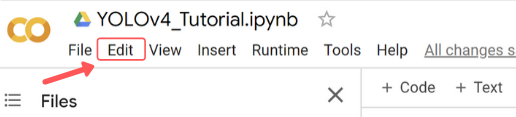
### ii) Haga clic en ** Configuración del cuaderno ** dentro del menú desplegable
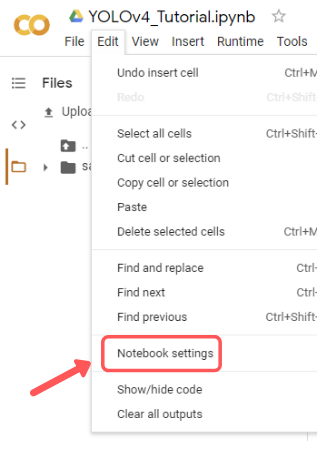
### iii) En 'Acelerador de hardware', seleccione ** GPU ** y luego presione ** Guardar ** 
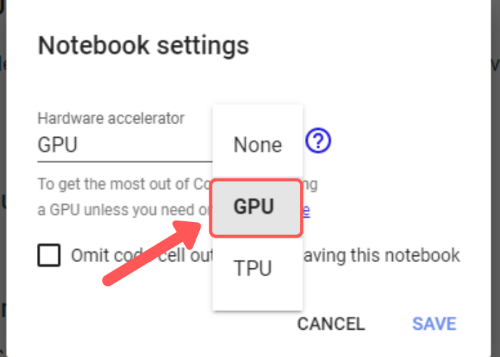

¡Su notebook ahora debería tener la GPU habilitada! 

Ahora además, para permitir cargar cosas directamente desde google drive, activar el siguiente comando


# Paso 2: Clonación y construcción de Darknet
Las siguientes celdas clonarán darknet del repositorio de AlexeyAB, ajustarán el Makefile para habilitar OPENCV y GPU para darknet y luego construirán darknet.

No preocuparse por las advertencias cuando ejecute la celda '!Make' 

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

# Paso 3: Descargue pesos YOLOv3 previamente entrenados
YOLOv3 ya ha sido entrenado en el conjunto de datos de coco que tiene 80 clases que puede predecir. Tomaremos estos pesos previamente entrenados para poder ejecutar YOLOv3 en estas clases previamente entrenados y obtener detecciones.

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov3.weights

# Paso 4: Definir funciones auxiliares

Estas tres funciones son funciones auxiliares que le permitirán mostrar la imagen en su Colab Notebook después de ejecutar sus detecciones, así como cargar y descargar imágenes hacia y desde su VM en la nube.

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Paso 5: ¡Ejecute sus detecciones con Darknet y YOLOv3!
¡Darknet ahora está construido y listo para ejecutar detecciones usando YOLOv3 en la nube! Puede averiguar qué tipo de clases pueden detectar los pesos YOLOv3 previamente entrenados haciendo clic aquí. [COCO CLASSES] (http://cocodataset.org/#explore)

El detector de objetos se puede ejecutar con el siguiente comando
```bash
!./darknet detector test <path to .data file> <path to config> <path to weights> <path to image>
```
Darknet viene con algunas imágenes ya instaladas en la carpeta darknet / data /.

** Nota: ** Después de ejecutar detecciones, OpenCV no puede abrir la imagen instantáneamente en la nube, por lo que debemos ejecutar:
```bash
imShow('predictions.jpg')
```
Esto generará la imagen con las detecciones mostradas. Las detecciones más recientes siempre se guardan en 'predictions.jpg'

Puedes probar los siguientes ejemplos para comprobar el funcionamiento 

In [ ]:
# run darknet detection on test images
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/person.jpg

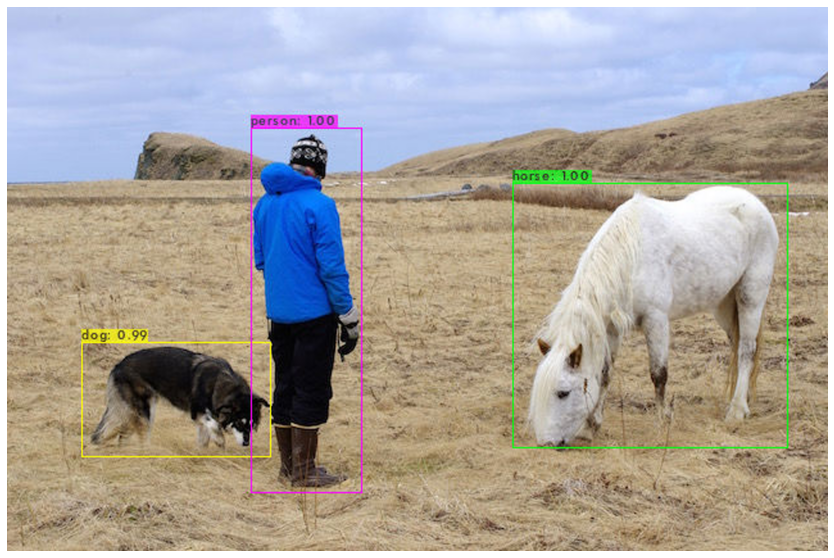

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

**Nota:** Desde Windows podemos usar los siguientes comandos para:

Muestre por pantalla detecciones:
```
.\darknet.exe detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -ext_output
  ```

Configurar umbral:
```
.\darknet.exe detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -ext_output data/dog.jpg -thresh 0.25
```

Cargar video:
```
.\darknet.exe detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights test.mp4 -out_filename res.avi
```

Utilizar webcam:
```
.\darknet.exe detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -c 0
```

# Paso 6: Carga de archivos locales o de Google Drive para usar
Es posible que desee ejecutar detecciones en más que solo las imágenes dentro de la carpeta darknet/data/. 
¡Este paso le mostrará cómo cargar archivos locales o de Google Drive a la máquina virtual en la nube y ejecutar detecciones en ellos!

### Método 1: Archivos locales
Para cargar archivos locales, simplemente use nuestra función auxiliar ejecutando 'upload ()' como se ve a continuación. Haga clic en **Elegir archivos** y seleccione la imagen de su máquina local que desea cargar en la máquina virtual en la nube.

Si esta función no funciona para usted, haga clic en el botón **Cargar** en el Explorador de archivos en el lado izquierdo de su computadora portátil.
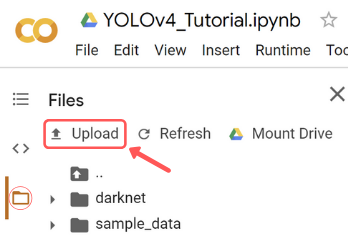

La imagen debe guardarse en el directorio raíz de la VM en la nube para que pueda acceder a ella desde el comando darknet ejecutando.
```
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights ../<your image name>
```

In [ ]:
# try out the upload helper function! (I uploaded an image called highway.jpg, upload whatever you want!)
%cd ..
upload()
%cd darknet

In [ ]:
# run darknet with YOLOv3 on your personal image! (note yours will not be called highway.jpg so change the name)
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights ../1574675951771,78.jpg
imShow('predictions.jpg')

### Método 2: Google Drive
Las imágenes también se pueden cargar desde su Google Drive y hacer que se ejecuten fácilmente las detecciones YOLOv4 en ellas.

Querrá ejecutar la celda a continuación para montar su unidad de Google en la VM en la nube para que pueda acceder a su contenido. ¡Es así de fácil!

** NOTA: ** Crearemos un enlace simbólico entre '/ content / gdrive / My \ Drive /' y '/ mydrive.

Esto significa que solo estamos creando un acceso directo '/ mydrive' para mapear el contenido dentro de la carpeta '/ content / gdrive / My \ Drive /'.

La razón de esto es que, en algún momento, tener el espacio en la ruta de la carpeta 'Mi unidad' puede causar problemas al ejecutar ciertos comandos. ¡Este enlace simbólico evitará que esto suceda!

Ahora puede ejecutar YOLOv4 con imágenes de Google Drive usando el comando darknet:
```
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /mydrive/<path to image>
```
Recomiendo guardar las imágenes dentro de una carpeta llamada 'images' en el nivel raíz de su Google Drive. 

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

/mydrive


In [ ]:
# cd back into the darknet folder to run detections
%cd darknet/

/content/darknet


In [ ]:
# run detections on image within your Google Drive!
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights /mydrive/images/street.jpg
imShow('predictions.jpg')

### Descargar archivos a la máquina local o Google Drive desde Cloud VM
También puede descargar imágenes fácilmente desde su VM en la nube para guardarlas en su máquina local o en Google Drive.

#### Método 1: Máquina local

Puede hacerlo fácilmente usando nuestra función auxiliar 'download()' o haciendo clic derecho en la imagen en el Explorador de archivos en el lado izquierdo de su computadora portátil y presionando **Descargar**. Los archivos se guardarán en su carpeta * Descargas *.

Esto es útil si desea descargar las **'predictions.jpg'** imágenes que genera el detector de objetos.

#### Método 2: Google Drive
Un simple comando de copia puede copiar cualquier archivo a su Google Drive, ya que ya está montado. (debe ejecutar el comando de montaje anterior si aún no lo ha hecho)

```
!cp <file to download> <destination to save file>
```
¡Vea un ejemplo de cada uno a continuación! 

In [ ]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

In [ ]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
!cp predictions.jpg /mydrive/images/detection1.jpg

# Paso 7: ¡Ejecutar YOLOv3 en video en la nube!



También puede ejecutar detecciones de objetos YOLOv3 en video en su máquina virtual de Google Colab. ¡Siga las celdas a continuación para ver cómo ejecutar videos desde su máquina local o desde su Google Drive!

## Video de la máquina local
A continuación se explica cómo cargar video desde la máquina local, ejecutar el detector y luego descargar el video que muestra las detecciones.

In [ ]:
# upload the video of your choosing! 
upload()

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show test.mp4 -i 0 -out_filename results.avi

In [ ]:
# download the video with detections shown
download('results.avi')

## Video de Google Drive
¡Aquí se explica cómo ejecutar el detector en el video almacenado en Google Drive y guardar el video directamente en Google Drive también!

**Nota:** Tendrá que cambiar las rutas a donde se almacena su video dentro de su Google Drive y donde desea que se almacene el video resultante. Tengo una carpeta de videos en el directorio de inicio de mi Google Drive.

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show /mydrive/videos/test.mp4 -i 0 -out_filename /mydrive/videos/results.avi

# Paso 8: Personalice YOLOv3 con las diferentes flags de línea de comando.


Darknet y YOLOv3 tienen muchos indicadores de línea de comando que puede agregar a su '!./darknet detector ...' para permitir que sea personalizable y flexible.

¡Te mostraré algunos ejemplos de estos flags que puedes aprovechar! Siéntase libre de mezclarlos y combinarlos para personalizar sus detecciones de la forma que desee.

## Indicador de umbral
Hay una marca '-thresh' que puede usar para agregar un umbral para las confidencias en las detecciones. Solo se devolverán las detecciones con un nivel de confianza superior al umbral establecido.

En el siguiente ejemplo, ejecutamos darknet con YOLOv3 sin un umbral en la imagen de prueba dog.jpg. La imagen devuelve cuatro detecciones, la confianza más baja se encuentra en la planta en maceta con un 33%.

Si agregamos el indicador '-thresh 0.5', esto solo generará tres detecciones, ya que ahora la planta en maceta cae por debajo del umbral y se ignora.

¡Compruébalo a continuación!

In [ ]:
# this is ran without the threshold flag set
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [ ]:
# same detections but ran with the threshold flag set to 0.5 (pottedplant is no longer detected!)
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/dog.jpg -thresh 0.5
imShow('predictions.jpg')

## Coordenadas del cuadro delimitador de salida
Puede generar las coordenadas del cuadro delimitador para cada detección con el indicador '-ext_output'. Esta bandera de salidas externas le dará algunos detalles adicionales sobre cada detección dentro de una imagen.

¡Compruébalo a continuación!

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595

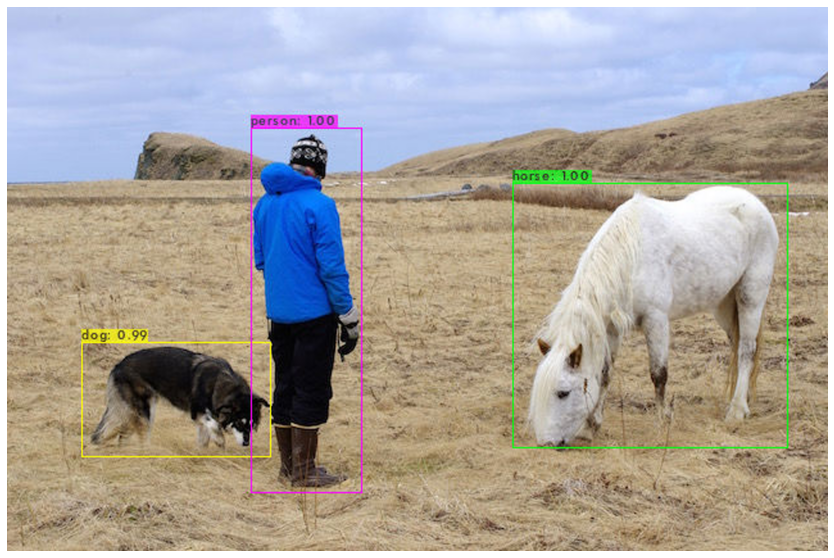

In [ ]:
# darknet run with external output flag to print bounding box coordinates
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/person.jpg -ext_output
imShow('predictions.jpg')

## No mostrar imagen
Puede agregar el flag '-dont_show' para que no se muestre la imagen después de ejecutar darknet. Esto realmente no afecta nada cuando se ejecuta en Colab, ya que de todos modos la imagen no se puede generar correctamente directamente desde la red oscura. Sin embargo, al agregar el indicador -dont_show, evitará que se muestre la siguiente advertencia.
```
Unable to init server: Could not connect: Connection refused

(predictions:1850): Gtk-WARNING **: 17:01:00.687: cannot open display:
```

Este es un flag importante que se debe tener cuando se ejecuta darknet con YOLOv3 en un video, ya que evitará que se muestre el video. 

In [ ]:
# running darknet with dont show flag set (no longer get warnings)
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/person.jpg -dont_show

# Paso 9: Varias imágenes a la vez
Las detecciones de objetos YOLOv3 se pueden ejecutar en varias imágenes a la vez. Esto se hace teniendo un archivo de texto que tiene las rutas a varias imágenes en las que desea que se ejecute el detector.

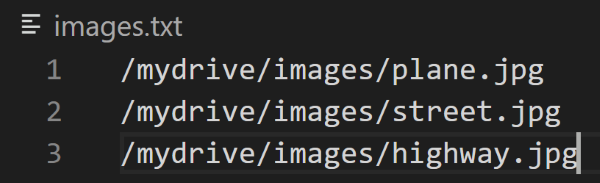

El archivo .txt debe tener este formato. Un camino a una imagen por línea.

Este archivo se almacena en mi directorio raíz de Google Drive y contiene la ruta a tres imágenes dentro de mi carpeta de imágenes de Google Drive.



## Guardar resultados en archivo .JSON
A continuación, se muestra un ejemplo de cómo guardar las detecciones de imágenes múltiples en un archivo .JSON.

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -ext_output -dont_show -out result.json < /mydrive/images.txt

In [ ]:
download('result.json')

## Guardar resultados en un archivo .txt
También puede guardar los resultados de ejecutar varias imágenes en un archivo de texto.

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show -ext_output < /mydrive/images.txt > result.txt

In [ ]:
download('result.txt')

# **¡Cómo entrenar su propio detector de objetos personalizado YOLOv3!**
A continuación se explica como generar un detector de objetos YOLOv3 personalizado para reconocer cualquier clase / objeto que desee

Para crear un detector YOLOv3 personalizado, necesitaremos lo siguiente:

* Conjunto de datos personalizado etiquetado en formato Yolo
* Archivo .cfg personalizado
* Archivos obj.data y obj.names
* archivo train.txt (test.txt es opcional aquí también)

# Paso 1: Recopilación y etiquetado de un conjunto de datos personalizado
Para crear un detector de objetos personalizado, se necesita un buen conjunto de datos de imágenes y etiquetas para que el detector pueda entrenarse de manera eficiente para detectar objetos.

Esto se puede hacer de dos maneras: mediante el uso de imágenes de Google o mediante la creación manual del propio conjunto de datos y el uso de una herramienta de anotación para dibujar etiquetas manualmente. 

**(¡Recomiendo la primera forma siempre y cuando se encuentren imagenes de la clase deseada!)**

### Método 1: Uso del conjunto de datos de imágenes de Google (RECOMENDADO)
Este método es el que recomiendo, ya que puede recopilar miles de imágenes y generar automáticamente sus etiquetas en cuestión de minutos. Recopilar un conjunto de datos del conjunto de datos de imágenes abiertas de Google y usar el kit de herramientas OIDv4 para generar etiquetas es fácil y eficiente en el tiempo. ¡El conjunto de datos contiene imágenes etiquetadas para más de 600 clases! [¡Explore el conjunto de datos aquí!] (https://storage.googleapis.com/openimages/web/index.html)


[Creación de un conjunto de datos YOLOv3 personalizado (video)] (https://www.youtube.com/watch?v=_4A9inxGqRM) 

¡Aquí hay un enlace a un repositorio de github para el kit de herramientas OIDv4! [Repositorio de Github] (https://github.com/theAIGuysCode/OIDv4_ToolKit)

Para este tutorial, crearé un detector de objetos de matrículas utilizando datos del conjunto de datos de imágenes abiertas de Google.

#### Conjunto de datos de entrenamiento
Ejecuté los siguientes comandos dentro del kit de herramientas para crear mi conjunto de datos de entrenamiento personalizado. Elegí usar 1500 imágenes dentro de mi conjunto de datos, pero la regla general es que cuantas más imágenes, mejor para una mayor precisión de su modelo. 
```
python main.py downloader --classes 'Vehicle registration plate' --type_csv train --limit 1500
```
**Nota: Si está entrenando un detector para varias clases, agregue '--multiclasses 1' al comando anterior para guardar todas sus imágenes de entrenamiento juntas en una carpeta.**

Esto crea una carpeta con 1500 imágenes de 'Matrículas de vehículos' (matrículas) para que entrenemos nuestro detector de objetos personalizado. 

#### Conjunto de datos de validación
**Nota:** Tener un conjunto de datos de validación es opcional pero muy recomendable.

Queremos tener un conjunto de datos de validación para probar correctamente nuestro detector de objetos personalizado después de que esté entrenado. Podemos aprovechar OIDv4_Toolkit ya que tiene imágenes separadas para validación para asegurarnos de que tenemos imágenes diferentes y no las que están en nuestro conjunto de datos de entrenamiento.

Podemos ejecutar los mismos comandos anteriores pero para validación. Recomiendo tener un tamaño de conjunto de datos de validación que sea aproximadamente del 20 al 30% del tamaño de su conjunto de datos de entrenamiento.
Como elegí 1500 imágenes para mis datos de entrenamiento, esto significa que tendré un tamaño de validación de 300 imágenes. (20% de 1500 = 300)

```
python main.py downloader --classes 'Vehicle registration plate' --type_csv validation --limit 300
```
#### ¡Ahora tienes un conjunto de datos de validación adecuado para probar tu detector de objetos personalizado después del entrenamiento! 


#### Conversión de etiquetas al formato YOLO

Las etiquetas que obtenemos del kit de herramientas no están en el formato YOLOv4 adecuado. Afortunadamente, con unos pocos comandos simples podemos convertirlos al formato adecuado.

Dentro de la carpeta raíz OIDv4_ToolKit, abra el archivo classes.txt y edítelo para tener las clases que acaba de descargar, una por línea.

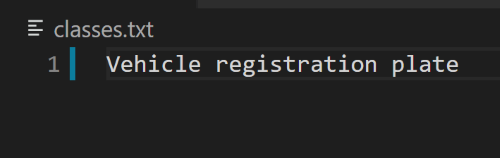

Ejemplo de classes.txt para detector de objetos multiclase:

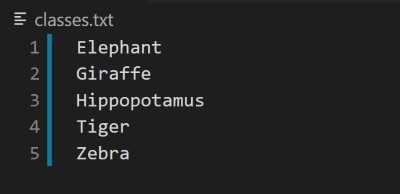

Ahora ejecute este comando para convertir las etiquetas generadas por OIDv4_Toolkit en etiquetas YOLOv3 (esto debería convertir las etiquetas del conjunto de datos de validación y de tren):
```
python convert_annotations.py
```

Esto convierte todas las etiquetas al formato YOLOv3 que ahora puede ser utilizado por darknet para entrenar adecuadamente nuestro detector de objetos personalizados.

Elimine la antigua carpeta 'Etiqueta' en el tren y las carpetas de validación que contiene las etiquetas no formateadas YOLOv3 ejecutando lo siguiente: (la ruta de su archivo tendrá un nombre diferente para 'Placa de matrícula del vehículo' ... dependiendo de las clases que haya descargado.
```
rm -r OID/Dataset/train/'Vehicle registration plate'/Label/
```
Y finalmente elimine también las etiquetas antiguas para su validación.
```
rm -r OID/Dataset/validation/'Vehicle registration plate'/Label/
```
Si este comando no funciona en su máquina, simplemente vaya a la carpeta con 'Etiqueta' y haga clic derecho y presione Eliminar para eliminarlo manualmente.

Las carpetas con todas sus imágenes y anotaciones ahora deberían verse así. Cada imagen debe tener un archivo de texto con el mismo nombre al lado (o debajo). 

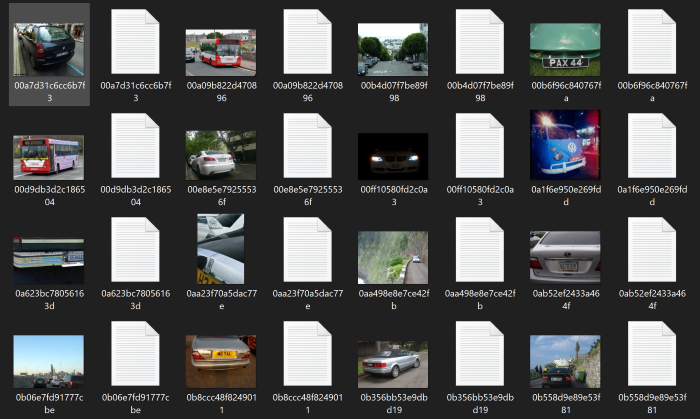

## ¡Ahora tienes tus conjuntos de datos de validación y capacitación personalizados de YOLOv3 con las etiquetas adecuadas!

### Método 2: etiquetar imágenes manualmente con la herramienta de anotación
Si no puede encontrar las imágenes o clases adecuadas dentro del conjunto de datos de imágenes abiertas de Google, tendrá que usar una herramienta de anotación para dibujar manualmente sus etiquetas, lo que puede ser un proceso tedioso.

A continuacion hay un link a un video en el que se explica cómo descargar imágenes en masa de imágenes de Google junto con cómo usar LabelImg, una herramienta de anotación, para crear un conjunto de datos personalizado para YOLOv4. Haga clic en el enlace de abajo para aprender cómo.

[Crear etiquetas y anotaciones para el conjunto de datos YOLOv3 personalizado (video)] (https://www.youtube.com/watch?v=EGQyDla8JNU) 

Después de seguir el video tutorial, debería poder tener una carpeta con imágenes y archivos de texto como su conjunto de datos de entrenamiento, así como una para su conjunto de datos de validación como el anterior.

## ¡Ahora tienes tus conjuntos de datos personalizados YOLOv3!

# Paso 2: Mover sus conjuntos de datos personalizados a su VM en la nube
Entonces, ahora que tiene sus conjuntos de datos formateados correctamente para usarlos en el entrenamiento y la validación, debemos moverlos a esta VM en la nube para que, cuando llegue el momento, podamos entrenar y validar nuestro modelo.

Recomiendo cambiar el nombre de la carpeta del conjunto de datos training con sus imágenes y archivos de texto en su máquina local para que se llame '**obj**' y luego crear una carpeta .zip de la carpeta 'obj'. Entonces recomiendo subir el zip a tu Google Drive, de manera que ahora debería tener el obj.zip en algún lugar de su unidad de Google.

Hacer lo mismo con el conjunto de datos de validación, pero asígnadole el nombre '**test**'. Por lo tanto, ahora deberías tener **test.zip** también cargado en su Google Drive.

Esto **reducirá en gran medida** el tiempo que lleva transferir nuestro conjunto de datos a nuestra máquina virtual en la nube, ya que si se intenta subir directamente tarda demasiado tiempo.

Ahora podemos copiar los ficheros zip y descomprimirlos en su VM en la nube.

In [ ]:
# this is where my datasets are stored within my Google Drive (I created a yolov4 folder to store all important files for custom training) 
!ls /mydrive/yolov3/

In [ ]:
# copy over both datasets into the root directory of the Colab VM (comment out test.zip if you are not using a validation dataset)
!cp /content/drive/MyDrive/yolov4/obj.zip ../
!cp /content/drive/MyDrive/yolov4/test.zip ../

In [ ]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/1.jpg          
  inflating: data/obj/1.txt          
  inflating: data/obj/10.jpg         
  inflating: data/obj/10.txt         
  inflating: data/obj/100.jpg        
  inflating: data/obj/100.txt        
  inflating: data/obj/101.jpg        
  inflating: data/obj/101.txt        
  inflating: data/obj/11.jpg         
  inflating: data/obj/11.txt         
  inflating: data/obj/112.jpg        
  inflating: data/obj/112.txt        
  inflating: data/obj/12.jpg         
  inflating: data/obj/12.txt         
  inflating: data/obj/124.jpg        
  inflating: data/obj/124.txt        
  inflating: data/obj/128.jpg        
  inflating: data/obj/128.txt        
  inflating: data/obj/13.jpg         
  inflating: data/obj/13.txt         
  inflating: data/obj/138.jpg        
  inflating: data/obj/138.txt        
  inflating: data/obj/14.jpg         
  inflating: data/obj/14.txt         
  inflating: data/obj/143.jpg        
  infl

# Paso 3: Configurar archivos para entrenamiento
Este paso implica configurar correctamente los archivos yolov3-custom.cfg, obj.data, obj.names, train.txt y test.txt personalizados.

Es importante configurar todos estos archivos con extrema precaución, ya que los errores pequeños o tipográficos pueden causar problemas importantes con el entrenamiento.

## i) Archivo cfg
Copia yolov3.cfg a tu Google Drive o descárgalo directamente ejecutando la celda a continuación. Esto nos permitirá editarlo en un editor de texto.

In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3-custom.cfg

In [ ]:
# to download to local machine (change its name to yolov4-custom.cfg once you download)
download('cfg/yolov3.cfg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Ahora se necesita editar el .cfg para que se ajuste a las necesidades según el detector de objetos. Ábrirlo en un editor de código o texto para hacerlo.


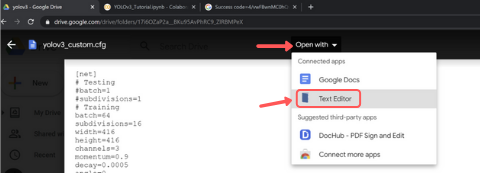

**Variables a configurar**

Recomiendo tener  **batch = 64** and **subdivisions = 16** para obtener los mejores resultados. Si hay algún problema, aumentar subdivisions a 32.

Realizar el resto de los cambios en el cfg según la cantidad de clases en las que esté entrenando el detector.

**Nota:**
Para este tutorial configuré mis **max_batches = 6000**, **steps = 4800, 5400**, cambié las **classes = 1** en las tres capas YOLO y **filters = 18** en las tres capas convolucionales antes de las capas de YOLO.

Cómo configurar sus variables:

width = 416

height = 416
**(estos pueden ser cualquier múltiplo de 32, 416 es estándar, a veces puede mejorar los resultados aumentando el valor como 608, pero ralentizará el entrenamiento)**

max_batches = (# de clases) * 2000
**(pero no menos de 6000, por lo que si está entrenando para 1, 2 o 3 clases, serán 6000, sin embargo, el detector para 5 clases tendría max_batches = 10000)**

steps  = (80% de max_batches), (90% de max_batches)
**(entonces, si su max_batches = 10000, entonces steps = 8000, 9000)**

filters  = (# de clases + 5) * 3
**(entonces, si estás entrenando para una clase, entonces tus filtros = 18, pero si estás entrenando para 4 clases, entonces tus filtros = 27)**


**Opcional:** Si tiene problemas de memoria o encuentra que el entrenamiento lleva mucho tiempo. En cada una de las tres capas de yolo en el cfg, cambie una línea de random = 1 a **random = 0** para acelerar el entrenamiento pero reducir ligeramente la precisión del modelo. También ayudará a ahorrar memoria si tiene problemas de memoria. 

Una vez modificado correctamente el fichero .cfg, volver a subirlo desde drive o desde la máquina local.

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3-custom.cfg ./cfg

## ii) obj.names y obj.data
Crear un nuevo archivo dentro de un editor de código o texto llamado ** obj.names ** donde hay que poner un nombre de clase por línea en el mismo orden que su classes.txt del paso de generación del conjunto de datos.

** NOTA: ** No hay que poner espacios en el nombre de su clase. Por esta razón, cambié "Vehicle Registration Plate" a **license_plate**.

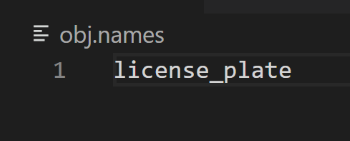

Ejemplo de archivo multiclase obj.names:

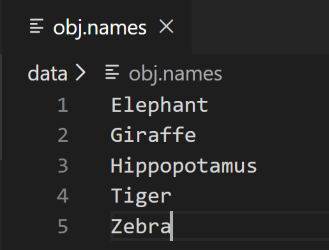

También creará un archivo **obj.data** y lo completará así (cambiar el número de clases en consecuencia, así como su ubicación de respaldo)

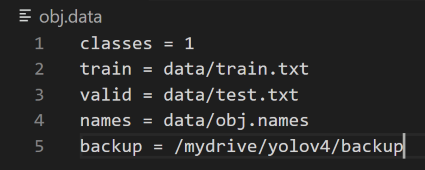

Esta ruta de respaldo es donde guardaremos los pesos de nuestro modelo durante el entrenamiento. Cree una carpeta de respaldo en su unidad de Google y coloque su ruta correcta en este archivo.

**Nota** Asegurarse de la ruta de drive desde la VM, de manera que se puedan guardar y leer correctamente las copias que se guarden en la direccion de backup

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

## iii) Generando train.txt y test.txt
Los últimos archivos de configuración necesarios antes de que podamos comenzar a entrenar nuestro detector personalizado son los archivos train.txt y test.txt que contienen las rutas relativas a todas nuestras imágenes de entrenamiento e imágenes de validación.

Afortunadamente, en el github de a continuación se pueden encontrar dos scripts que generan fácilmente estos dos archivos con las rutas adecuadas a todas las imágenes.

Se puede acceder a los scripts desde el [Github Repo] (https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial)

Simplemente descargar los dos archivos a su máquina local y subelos a tu Google Drive para que podamos usarlos desde la Colab Notebook.

In [ ]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /content/drive/MyDrive/yolov4/generate_train.py ./
!cp /content/drive/MyDrive/yolov4/generate_test.py ./

Ahora simplemente ejecute ambos scripts para generar los dos archivos txt.

In [ ]:
!python generate_train.py
!python generate_test.py

In [ ]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

Si no estas seguro de si la generación de archivos funcionó y quieres verificar que todo salió según lo planeado, haz doble clic en **train.txt** en el Explorador de archivos del lado izquierdo y debería verse similar a la siguiente foto:

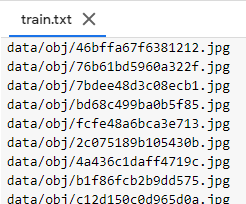

Contendrá una línea para cada ruta de imagen de entrenamiento.

# Paso 4: Descargue pesos previamente entrenados para las capas convolucionales.
Este paso descarga los pesos de las capas convolucionales de la red YOLOv4. El uso de estos pesos ayuda a que su detector de objetos personalizado sea mucho más preciso y no tenga que entrenar tanto tiempo. No es obligatorio usarlos, pero ayudará a que el modelo converja y sea preciso mucho más rápido.

**Nota:** En mi caso cambie el nombre de los pesos a yolov3.conv.74 para evitar confusiones

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-07-27 09:11:18--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  41.1MB/s    in 4.2s    

2021-07-27 09:11:22 (36.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Paso 5: ¡Entrenar el detector de objetos personalizado!
Ahora está todo listo para entrenar el detector de objetos YOLOv3 personalizado en cualquier clase posible. Para ello,  ejecutar el siguiente comando. (-dont_show flag evita que el gráfico aparezca ya que Colab Notebook no puede abrir imágenes en el lugar, -map significa precisión promedio en el gráfico para ver la precisión de su modelo, solo agregar el flag de map si se tiene un conjunto de datos de validación)
```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show -map
```
** SUGERENCIA: ** Esto puede llevar varias horas, según la cantidad de iteraciones que elijas en el archivo .cfg. Hay que dejar que esto se ejecute por la noche o mientas estes en el trabajo durante el día, etc. Aunque en caso de parar el entrenamiento en cualquier momento, se puede seguir desde donde se quejo sin problema. Sin embargo, Colab Cloud Service pone en marcha sus máquinas virtuales si está inactivo durante demasiado tiempo (30-90 minutos).

Para evitar esto, presionar (CTRL + MAYÚS + i) al mismo tiempo para abrir la vista del inspector en su navegador.

Pegar el siguiente código en la ventana de su consola y presionar **Enter**
```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```
Debería tener este aspecto, de manera que hará clic en la pantalla cada 10 minutos para que no te echen por estar inactivo. ¡HACKS! 

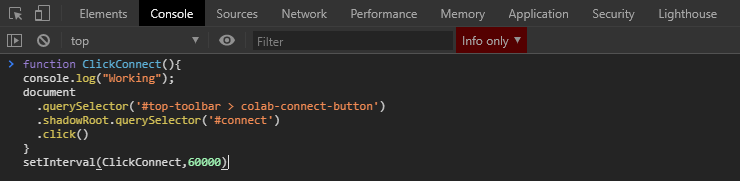

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg darknet53.conv.57 -dont_show -map

Después del entrenamiento, se puede observar un gráfico de cómo le ha ido a tu modelo a lo largo del proceso de entrenamiento ejecutando el siguiente comando. Muestra un gráfico de la pérdida promedio (avg loss) frente a las iteraciones. 

Para que su modelo sea 'preciso', se debe apuntar a una pérdida inferior a 2. Aunque puede variar de 0.05 (para un modelo pequeño y un conjunto de datos fácil) a 3.0 (para un modelo grande y un conjunto de datos difícil). 

**¿Cuando detener el entrenamiento?**
Cuando vea que la pérdida promedio 0.xxxxxx avg ya no disminuye aunque pasen muchas iteraciones, entonces se debe dejar de entrenar para no incurrir en un problema de sobreentrenamiento. 

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

¡Así es como debería verse el chart.png después de un entrenamiento ininterrumpido! Si se detiene el entrenamiento o se bloquea durante el entrenamiento, aún se puede verificar la precisión de su modelo en los siguientes pasos.











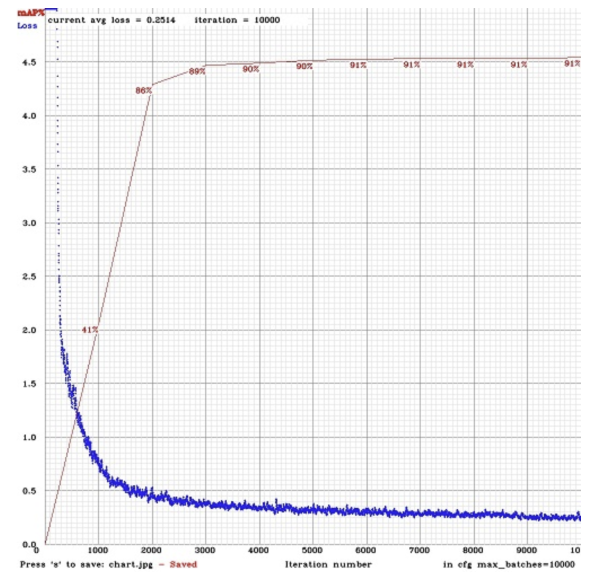

**TRUCO**: Si por alguna razón obtiene un error o su Colab se queda inactivo durante el entrenamiento, ¡no se ha perdido el modelo y pesos parcialmente entrenados! Cada 100 iteraciones, un archivo de pesos llamado **yolov3-obj_last.weights** se guarda en la carpeta **mydrive/yolov3/backup/** (donde sea que esté su carpeta de respaldo). Es por eso que creamos esta carpeta en nuestra unidad de Google y no en la VM en la nube, dado que si su tiempo de ejecución falla y su carpeta de respaldo está en su VM en la nube, se perderán los pesos y el progreso de entrenamiento.

¡Podemos comenzar el entrenamiento desde nuestro último archivo de pesos guardado para no tener que reiniciar! Simplemente ejecutar el siguiente comando pero con tu ubicación de respaldo.
```
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg /mydrive/yolov3/backup/yolov3-obj_last.weights -dont_show
```

In [ ]:
# kick off training from where it last saved
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg /mydrive/yolov3/backup/yolov3-obj_best.weights -dont_show

# Paso 6: Verificación de la precisión promedio (mAP) de su modelo
Si no se ejecutó el entrenamiento con la bandera '-map- agregada, aún se puede encontrar el mAP del modelo después del entrenamiento. Ejecutar el siguiente comando en cualquiera de los pesos guardados del entrenamiento para ver el valor mAP para el archivo de ese peso específico. Sugeriría ejecutarlo en varios de los pesos guardados para comparar y encontrar los pesos con el mAP más alto, ya que es el más preciso.

** NOTA: ** Si cree que su archivo de pesos final se ha sobreentrenado, es importante ejecutar estos comandos mAP para ver si uno de los pesos guardados anteriormente es un modelo más preciso para sus clases.

In [ ]:
!./darknet detector map data/obj.data cfg/yolov3-custom.cfg /mydrive/yolov3/backup/yolov3-obj_1000.weights

# Paso 7: ¡Ejecutar el detector de objetos personalizado!
Ahora ya tienes un detector de objetos personalizado para realizar tus propias detecciones. Para ello vamos a probarlo y a comprobar que funciona correctamente.

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-custom.cfg
%cd ..

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/yolov3/backup/yolov3-obj_last.weights /mydrive/images/car2.jpg -thresh 0.3
imShow('predictions.jpg')

#**Ejecución de Yolo en ROS**

Una vez entrenada la red neuronal, ya habremos obtenido un fichero con los pesos, así como los ficheros de configuración necesarios, de manera que podamos detectar los objetos deseados. 

El unico fichero nuevo que deberemos crear es el archivo de configuracion yolov3-custom.yaml, el cual indicara a ROS de donde cargar los pesos y el archivo .cfg, así como configuraremos el umbral a utilizar, y el nombre de las clases disponibles.

Todos estos pasos a seguir estan indicados en la introduccion en el apartado: **COMO HACER QUE FUNCIONE DARKNET_ROS PARA DETECTAR NUESTRAS PROPIAS CLASES**

Una vez copiados los ficheros adecuados, ya tendremos Darknet_ros funcionando correctamente, y entrenado para detectar las clases deseadas.
